In [1]:
from obspy import read
from obspy.core.util import get_example_file
import numpy as np
import pandas as pd
import segyio
#filename = get_example_file("/Train_data/SGY/1.sgy")
import matplotlib.pyplot as plt
import swprocess

segyfile = read("../data/raw/SGY/145/1.sgy")

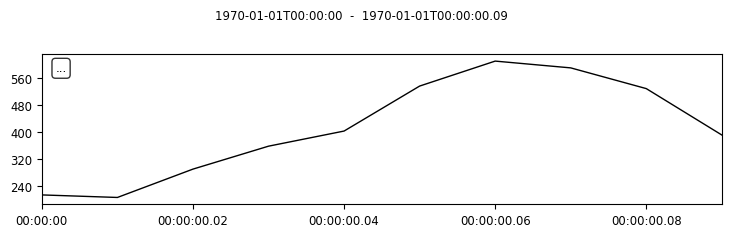

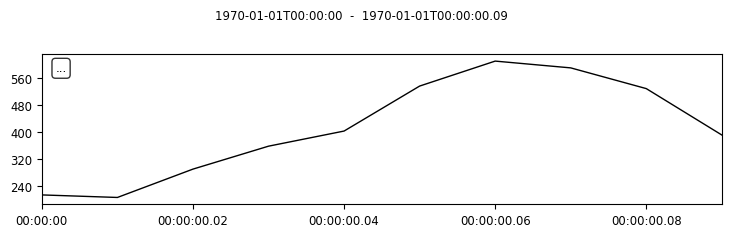

In [2]:
segyfile[0].plot()

In [6]:
segyfile[0].data

array([213.006  , 205.439  , 289.82788, 358.09497, 403.11597, 537.031  ,
       611.3718 , 591.176  , 529.47   , 391.32886], dtype=float32)

In [16]:
filename = "./Train_data/SGY/145/1.sgy"
with segyio.open(filename, "r", endian = 'little') as segyfile:
    # Читаем заголовки трасс
    headers = segyfile.header
    print(headers[0])

{TRACE_SEQUENCE_LINE: 1, TRACE_SEQUENCE_FILE: 0, FieldRecord: 1, TraceNumber: 1, EnergySourcePoint: 0, CDP: 1, CDP_TRACE: 1, TraceIdentificationCode: -1, NSummedTraces: 0, NStackedTraces: 0, DataUse: 0, offset: 0, ReceiverGroupElevation: 0, SourceSurfaceElevation: 0, SourceDepth: 0, ReceiverDatumElevation: 0, SourceDatumElevation: 0, SourceWaterDepth: 0, GroupWaterDepth: 0, ElevationScalar: -100, SourceGroupScalar: -100, SourceX: 47280220, SourceY: 766701450, GroupX: 47280220, GroupY: 766701450, CoordinateUnits: 1, WeatheringVelocity: 0, SubWeatheringVelocity: 0, SourceUpholeTime: 0, GroupUpholeTime: 0, SourceStaticCorrection: 0, GroupStaticCorrection: 0, TotalStaticApplied: 0, LagTimeA: 0, LagTimeB: 0, DelayRecordingTime: 0, MuteTimeStart: 0, MuteTimeEND: 0, TRACE_SAMPLE_COUNT: 10, TRACE_SAMPLE_INTERVAL: 10000, GainType: 0, InstrumentGainConstant: 0, InstrumentInitialGain: 0, Correlated: 0, SweepFrequencyStart: 0, SweepFrequencyEnd: 0, SweepLength: 0, SweepType: 0, SweepTraceTaperLeng

In [16]:
filename = "../data/raw/SGY/220/1.sgy"
with segyio.open(filename, "r", endian = 'little') as segyfile:
    # Читаем заголовки трасс
    headers = segyfile.header
    print(headers[0])

{TRACE_SEQUENCE_LINE: 1, TRACE_SEQUENCE_FILE: 0, FieldRecord: 1, TraceNumber: 1, EnergySourcePoint: 0, CDP: 1, CDP_TRACE: 1, TraceIdentificationCode: -1, NSummedTraces: 0, NStackedTraces: 0, DataUse: 0, offset: 0, ReceiverGroupElevation: 0, SourceSurfaceElevation: 0, SourceDepth: 0, ReceiverDatumElevation: 0, SourceDatumElevation: 0, SourceWaterDepth: 0, GroupWaterDepth: 0, ElevationScalar: -100, SourceGroupScalar: -100, SourceX: 48072466, SourceY: 0, GroupX: 48072466, GroupY: 0, CoordinateUnits: 1, WeatheringVelocity: 0, SubWeatheringVelocity: 0, SourceUpholeTime: 0, GroupUpholeTime: 0, SourceStaticCorrection: 0, GroupStaticCorrection: 0, TotalStaticApplied: 0, LagTimeA: 0, LagTimeB: 0, DelayRecordingTime: 0, MuteTimeStart: 0, MuteTimeEND: 0, TRACE_SAMPLE_COUNT: 10, TRACE_SAMPLE_INTERVAL: 10000, GainType: 0, InstrumentGainConstant: 0, InstrumentInitialGain: 0, Correlated: 0, SweepFrequencyStart: 0, SweepFrequencyEnd: 0, SweepLength: 0, SweepType: 0, SweepTraceTaperLengthStart: 0, Swee

In [17]:
data = pd.read_csv(f"./Train_data/TXT/145_UR203D1756P1016_fund_Polovkov.txt", delimiter="\t")

In [18]:
data

,Receiver_Midpoint_X,Receiver_Midpoint_Y,Depth,Velocity,Vs30,Offset_from_1st_point
0,472802.2,7667014.50,-4.890,222.970,240.73,0.00
1,472802.2,7667014.50,-14.670,194.994,240.73,0.00
2,472802.2,7667014.50,-24.450,347.695,240.73,0.00
3,472802.2,7667014.50,-34.230,266.658,240.73,0.00
4,472802.2,7667014.50,-44.010,456.961,240.73,0.00
...,...,...,...,...,...,...
1595,495448.6,7702527.85,-53.790,262.295,233.60,22647.18
1596,495448.6,7702527.85,-63.570,269.620,233.60,22647.18
1597,495448.6,7702527.85,-73.350,276.347,233.60,22647.18
1598,495448.6,7702527.85,-83.130,281.114,233.60,22647.18


In [7]:
data = pd.read_csv(f"../data/raw/TXT/145_UR203D1756P1016_fund_Polovkov.txt", delimiter="\t")

In [8]:
data

,Receiver_Midpoint_X,Receiver_Midpoint_Y,Depth,Velocity,Vs30,Offset_from_1st_point
0,472802.2,7667014.50,-4.890,222.970,240.73,0.00
1,472802.2,7667014.50,-14.670,194.994,240.73,0.00
2,472802.2,7667014.50,-24.450,347.695,240.73,0.00
3,472802.2,7667014.50,-34.230,266.658,240.73,0.00
4,472802.2,7667014.50,-44.010,456.961,240.73,0.00
...,...,...,...,...,...,...
1595,495448.6,7702527.85,-53.790,262.295,233.60,22647.18
1596,495448.6,7702527.85,-63.570,269.620,233.60,22647.18
1597,495448.6,7702527.85,-73.350,276.347,233.60,22647.18
1598,495448.6,7702527.85,-83.130,281.114,233.60,22647.18


In [9]:
data1 = pd.read_csv(f"../data/raw/TXT/242_UR203D2220P1255_fund_Rakhimov (1).txt", delimiter="\t")

In [10]:
data1

,Receiver_Midpoint_X,Receiver_Midpoint_Y,Depth,Velocity,Vs30,Offset_from_1st_point
0,483558.85,7662467.65,-4.889,181.733,205.58,0.00000
1,483558.85,7662467.65,-14.667,197.372,205.58,0.00000
2,483558.85,7662467.65,-24.444,242.604,205.58,0.00000
3,483558.85,7662467.65,-34.222,292.400,205.58,0.00000
4,483558.85,7662467.65,-44.000,390.212,205.58,0.00000
...,...,...,...,...,...,...
1245,501014.45,7689935.50,-53.778,297.076,210.50,17456.38677
1246,501014.45,7689935.50,-63.556,309.654,210.50,17456.38677
1247,501014.45,7689935.50,-73.333,313.008,210.50,17456.38677
1248,501014.45,7689935.50,-83.111,323.276,210.50,17456.38677


In [12]:
data0=[data, data1]
pd.concat(data0, ignore_index=True)

,Receiver_Midpoint_X,Receiver_Midpoint_Y,Depth,Velocity,Vs30,Offset_from_1st_point
0,472802.20,7667014.5,-4.890,222.970,240.73,0.00000
1,472802.20,7667014.5,-14.670,194.994,240.73,0.00000
2,472802.20,7667014.5,-24.450,347.695,240.73,0.00000
3,472802.20,7667014.5,-34.230,266.658,240.73,0.00000
4,472802.20,7667014.5,-44.010,456.961,240.73,0.00000
...,...,...,...,...,...,...
2845,501014.45,7689935.5,-53.778,297.076,210.50,17456.38677
2846,501014.45,7689935.5,-63.556,309.654,210.50,17456.38677
2847,501014.45,7689935.5,-73.333,313.008,210.50,17456.38677
2848,501014.45,7689935.5,-83.111,323.276,210.50,17456.38677


In [14]:
import os
file_list = []
for root, dirs, files in os.walk("../data/raw/TXT"):
    for file in files:
        if file.endswith(".txt"):
            file_list.append(pd.read_csv(os.path.join(root, file), delimiter="\t"))
pd.concat(file_list, ignore_index=True)

,Receiver_Midpoint_X,Receiver_Midpoint_Y,Depth,Velocity,Vs30,Offset_from_1st_point
0,472802.20,7667014.5,-4.890,222.970,240.73,0.00000
1,472802.20,7667014.5,-14.670,194.994,240.73,0.00000
2,472802.20,7667014.5,-24.450,347.695,240.73,0.00000
3,472802.20,7667014.5,-34.230,266.658,240.73,0.00000
4,472802.20,7667014.5,-44.010,456.961,240.73,0.00000
...,...,...,...,...,...,...
43635,501014.45,7689935.5,-53.778,297.076,210.50,17456.38677
43636,501014.45,7689935.5,-63.556,309.654,210.50,17456.38677
43637,501014.45,7689935.5,-73.333,313.008,210.50,17456.38677
43638,501014.45,7689935.5,-83.111,323.276,210.50,17456.38677


In [27]:
def round_to_nearest_5(number):
    last_digit = number % 10
    if last_digit < 3:
        return number - last_digit
    elif last_digit < 8:
        return number - last_digit + 5
    else:
        return number - last_digit + 10
    
with segyio.open("../data/raw/SGY/242/125.sgy", "r", endian='little') as segyfile:
    # Читаем заголовки трасс
    headers = segyfile.header
    x_coord = round_to_nearest_5(headers[0][segyio.TraceField.SourceX])/100
    y_coord = round_to_nearest_5(headers[0][segyio.TraceField.SourceY])/100
    print(x_coord, y_coord)

501014.45 7689935.5


In [19]:
def make_unite_output(root_dir, extension='.txt'):
    file_list = []
    for root, dirs, files in os.walk(root_dir):
        for file in files:
            if file.endswith(extension):
                file_list.append(pd.read_csv(os.path.join(root, file), delimiter="\t"))
    return pd.concat(file_list, ignore_index=True)
output_df = make_unite_output("../data/raw/TXT")

In [26]:
output_df[output_df['Receiver_Midpoint_X'] == 501014.45]

,Receiver_Midpoint_X,Receiver_Midpoint_Y,Depth,Velocity,Vs30,Offset_from_1st_point
43630,501014.45,7689935.5,-4.889,215.867,210.5,17456.38677
43631,501014.45,7689935.5,-14.667,221.373,210.5,17456.38677
43632,501014.45,7689935.5,-24.444,197.358,210.5,17456.38677
43633,501014.45,7689935.5,-34.222,189.918,210.5,17456.38677
43634,501014.45,7689935.5,-44.000,241.935,210.5,17456.38677
43635,501014.45,7689935.5,-53.778,297.076,210.5,17456.38677
43636,501014.45,7689935.5,-63.556,309.654,210.5,17456.38677
43637,501014.45,7689935.5,-73.333,313.008,210.5,17456.38677
43638,501014.45,7689935.5,-83.111,323.276,210.5,17456.38677
43639,501014.45,7689935.5,-92.400,323.073,210.5,17456.38677
